In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
documents = pd.read_csv("..\\data\\external_data.csv",  encoding='ISO-8859-2')
documents = documents.drop(columns = ['Unnamed: 0'])

with open('..\\data\\polish.stopwords.txt', 'r', encoding='ISO-8859-2') as f:
    stopwords = set(f.read().split())

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='ISO-8859-2', stop_words=stopwords)
features = tfidf.fit_transform(documents.text).toarray()
labels = documents.category



C:\Users\User\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aleĺź', 'aĺ', 'aĺź', 'byä', 'byĺ', 'bä', 'caĺ', 'cej', 'ciä', 'coĺ', 'dokä', 'doĺ', 'duĺźo', 'dzie', 'dziĺ', 'dzy', 'dä', 'gdyĺź', 'gdzieĺ', 'iĺź', 'jakaĺ', 'jakichĺ', 'jakiĺ', 'jakiĺź', 'jakoĺ', 'jednakĺźe', 'jeĺ', 'jeĺźeli', 'juĺź', 'jä', 'kaĺźdy', 'kimĺ', 'ktoĺ', 'ktăłra', 'ktăłre', 'ktăłrego', 'ktăłrej', 'ktăłry', 'ktăłrych', 'ktăłrym', 'ktăłrzy', 'li', 'majä', 'maĺ', 'miä', 'mnä', 'mogä', 'moĺźe', 'moĺźliwe', 'moĺźna', 'măłj', 'niä', 'niĺź', 'okoĺ', 'poniewaĺź', 'przecieĺź', 'răłwnieĺź', 'siä', 'skä', 'sobä', 'sposăłb', 'sä', 'takĺźe', 'teĺź', 'tobä', 'toteĺź', 'totobä', 'twăłj', 'ug', 'wedĺ', 'wiä', 'wĺ', 'znăłw', 'zostaĺ', 'zĺ', 'ĺźaden', 'ĺźadna', 'ĺźadne', 'ĺźadnych', 'ĺźe', 'ĺźeby'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [8]:
def selector(n):
    chi2_selector = SelectKBest(chi2, k=n)
    return chi2_selector.fit_transform(features, labels)


In [9]:
clf  = DecisionTreeClassifier()
cv_test_scores = cross_val_score(clf, selector(1000), labels, cv=5, scoring='accuracy')


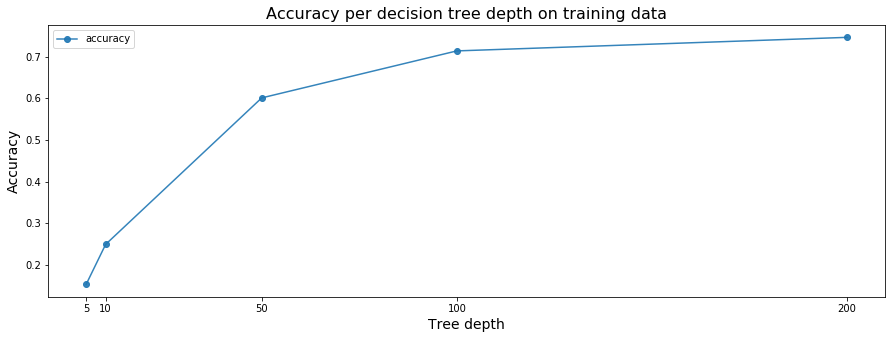

In [14]:
def examine_tree_depth(tree_depths, folds=5):
    cv_scores_list = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, selector(1000), labels, cv=folds, scoring='accuracy')
        cv_scores_list.append(cv_scores.max())
    cv_scores_arr = np.array(cv_scores_list)
    return cv_scores_arr
  
def plot_cross_validation_on_trees(tree_depths, cv_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores, '-o', label='accuracy', alpha=0.9)
    ylim = plt.ylim()
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(tree_depths)
    ax.legend()

depths = [5,10, 50, 100, 200]
scores = examine_tree_depth(depths)

plot_cross_validation_on_trees(depths, scores, 
                               'Accuracy per decision tree depth on training data')
plt.savefig('tree_depth.png')

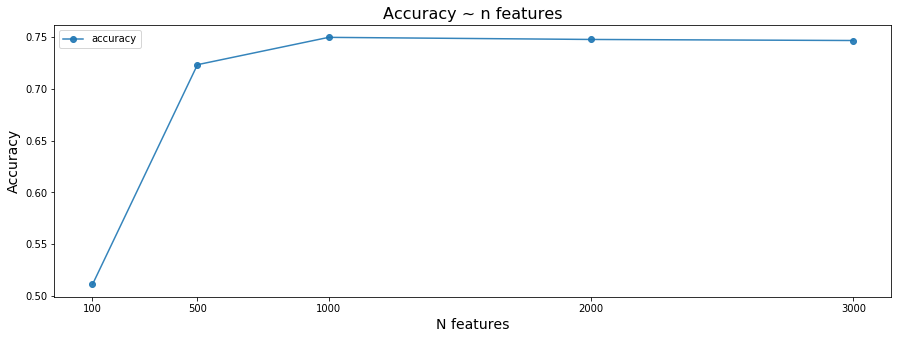

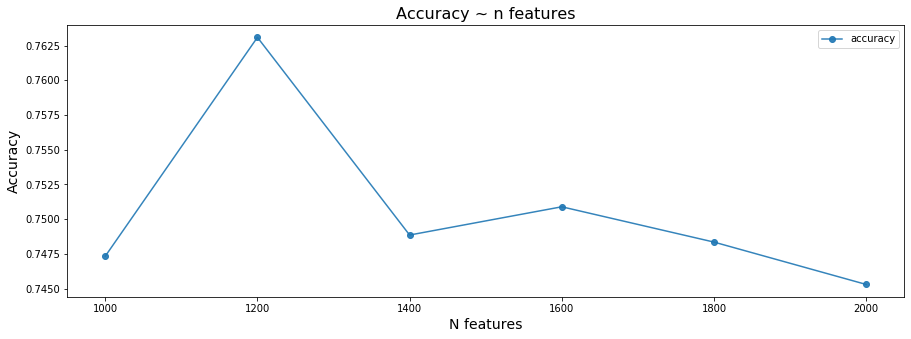

In [16]:
def examine_features(y, nfeatures, cv=5, scoring='accuracy'):
  cv_scores_list = []
  for n in nfeatures:  
      tree_model = DecisionTreeClassifier()
      cv_scores = cross_val_score(tree_model, selector(n), y, cv=cv, scoring=scoring)
      cv_scores_list.append(cv_scores.max())
  cv_scores = np.array(cv_scores_list)
  return cv_scores

def plot_cross_validation_on_trees(depths, cv_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores, '-o', label='accuracy', alpha=0.9)
    ylim = plt.ylim()
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('N features', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

n_features = [100, 500, 1000, 2000, 3000]
scores = examine_features(labels, n_features)

plot_cross_validation_on_trees(n_features, scores, 
                               'Accuracy ~ n features')
plt.savefig('tree-features.png')

n_features = [1000,1200,1400,1600,1800,2000]
scores = examine_features(labels, n_features)

plot_cross_validation_on_trees(n_features, scores, 
                               'Accuracy ~ n features')
plt.savefig('tree-features2.png')

In [19]:
clf  = DecisionTreeClassifier()
print(cross_val_score(clf, selector(1500), labels, cv=5, scoring='accuracy'))



[0.73932927 0.73577236 0.74631418 0.74885613 0.73970513]
